# Loopar med `forvalues`

*Av Anders Sundell*

Loopar är ett kraftfullt sätt att effektivisera vår kod, och automatisera uppgifter som kräver en massa upprepning. Till exempel koda om en mängd variabler på samma sätt, göra om en och samma analys på en massa undergrupper, göra om en och samma analys för en mängd variabler, och så vidare.

Det finns två huvudkommandon för loopar i Stata: `forvalues` och `foreach`. Här går vi igenom `forvalues`, som används när man loopar över tal i en sekvens. Med `foreach` kan vi istället loopa över både tal och textsträngar.

## En enkel loop

Principen med loopar är att vi berättar för Stata hur många gånger vi vill köra vår loop, och vad som ska ändras varje gång (det vore ju meningslöst att göra exakt samma sak gång på gång). Sen berättar vi vad som ska hända varje "runda", och så körs loopen så många gånger som vi specifierat.

Den första loop vi ska göra är enklast tänkbara. Vi ska köra loopen fem gånger, och räkna upp ett tal från 1 till 5. Inne i själva loopen händer bara en sak - vi skriver ut talet.

Koden är `forvalues nr = 1(1)5 {}`
forvalues är kommandot. nr är vad vi väljer att kalla värdet vi ändrar för varje runda av loopen. Här kallar vi det "nr". Sedan står att "nr" ska börja på 1, och sedan räknas upp med 1 steg, tills det når värdet 5.

Klamrarna { } avgränsar loopen. Allt innanför klamrarna upprepas en gång för varje runda. Det går bra att ha dem på olika rader.

"nr" sparas som ett [lokalt macro](macros_sv.html), och vi kan sedan använda det inne i loopen. I koden nedan händer bara en sak inne i loopen, och det är display `nr', vilket betyder att vi vill visa värdet som "nr" har. Första rundan har det värdet 1, och därför skrivs en etta ut. Andra gången har den värdet 2, osv.

In [12]:
forvalues nr = 1(1)5 {
    display `nr'
    }


1
2
3
4
5


Man måste inte börja på 1, och måste inte räkna i steg om 1. I koden nedan börjar vi på 200 och räknar uppåt i steg om 100.

In [13]:
forvalues nr = 200(100)600 {
    display `nr'
    }


200
300
400
500
600


Svårare än så är det inte. Sen kan vi sätta in "nr" i olika sammanhang. Säg att vi skulle vilja göra tio tomma nya variabler, som vi sedan ska använda för att skriva in arbetslösheten för olika länder under åren 2005-2020. Vi vill ha en variabel som heter unemployment2005, en som heter unemployment2006, osv.

Då kan vi lätt göra det med en loop:

In [14]:
forvalues yr = 2005(1)2020 {
    gen unemployment`yr' = .
    }

Vi har nu fått 16 nya variabler, som heter unemployment2005, unemployment2006, hela vägen upp till unemployment2020.

Precis som med andra [macron](macros_sv.html) går de att stoppa in var som helst i koden.

## En lite mer utvecklad loop

Vi ska nu prova att göra en lite mer avancerad loop. Den är egentligen inte mer tekniskt avancerad, utan bygger på samma principer, men gör lite mer inne i själva loopen.

Det vi ska göra är att med hjälp av QoG-data göra en mängd grafer, som visar fördelningen av medellivslängd år för år. Sedan ska vi spara varje enskild graf som en bildfil, så att vi sedan kan sätta ihop dem i en snygg gif.

I koden nedan laddas datan in, och så gör vi en graf för ett enskilt år, 2000. Vi anger att histogrammet ska börja på 16, att staplarna ska vara 2 år breda, att titeln ska vara "Year: 2000", att x-axeln ska markera tiotals år, och slutligen att y-axeln ska visa procent.

Sedan sparar vi diagrammet som en .png-fil. Man kan även spara som .pdf till exempel.


(Quality of Government Basic dataset 2018 - Time-Series)

(bin=33, start=16, width=2)


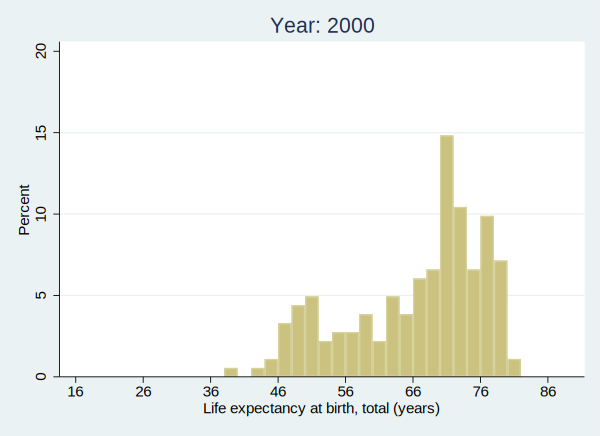





(file /Users/anderssundell/Dropbox/Jupyter/stathelp/graphs/lifexp2000.pdf written in PDF format)


In [32]:
use "https://www.qogdata.pol.gu.se/dataarchive/qog_bas_ts_jan18.dta", clear

histogram wdi_lifexp if year==2000, start(16) width(2) title("Year: 2000") xlabel(16(10)90) ylabel(0(5)20) percent
graph export "/Users/anderssundell/Dropbox/Jupyter/stathelp/graphs/lifexp2000.png", replace

Ganska fint. Men nu ska vi göra det med en loop. Vi vill ha en sån här graf för alla år mellan 1960 och 2015. Vi tar då och gör en forvalues-loop, kopierar diagramkoden, och byter ut alla ställen där det står 2000 mot `yr'. Det står på tre ställen - dels i villkoret som anger vilken data som ska användas när histogrammet ska ritas, i titeln på grafen, och i filnamnet på pdf-filen som sparas. Det går lika bra att använda i alla sammanhang. Vi lägger även till quietly framför kommandona i loopen för att förhindra att vi här får upp en mängd grafer.

In [36]:
forvalues yr = 1960(1)2015 {
    quietly histogram wdi_lifexp if year==`yr', start(16) width(2) title("Year: `yr'") xlabel(16(10)90) ylabel(0(5)20) percent
    quietly graph export "/Users/anderssundell/Dropbox/Jupyter/stathelp/graphs/lifexp`yr'.png", replace
    }

Vi får nu ut 56 filer, som kan sättas ihop till en animerad gif med något lämpligt program. Att göra den här animerade grafen manuellt, till exempel genom att kopiera samma kod 56 gånger, vore inte att rekommendera. Om man sedan kommer på att man vill ändra på något måste det ändras överallt. Med loopen behöver det bara ändras en gång.

<img src = "../images/lifexp.gif" width="600" />

## Avslutning
Loopar är som sagt väldigt kraftfulla, och gör repetitiva uppgifter mycket mer överskådliga. Och man kan stoppa in vad som helst innanför klamrarna som avgränsar loopen. Men om man behöver loopa över något annat än en sekvens nummer räcker inte forvalues till. Då får man använda sig av foreach, men det är en annan guide.